# 18. 로이터 뉴스 데이터

In [30]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

print('=3')

=3


## 훈련 데이터와 테스트 데이터 로드

* num_words
    * 이 데이터에서 빈도수 기준으로 상위 몇 번째 단어까지 사용할 것인지 조절. 
    * 각 단어는 고유한 번호가 정해져 있는 상태이고, 이를 통해서 사용할 단어의 수를 정함.
    
 이 데이터의 단어들은 등장 빈도수가 높은 순서대로 낮은 정수가 맵핑되어 있습니다. 예를 들어서 50번 단어보다는 10번 단어가 데이터 전체에서 빈도수가 등장 빈도 순위로 40등이 더 높은 단어입니다. 위에서 num_words=10000은 1~10,000번 단어만 사용한다는 의미입니다. 등장 빈도수가 높은 단어들만 사용하겠다는 의미지요.

주의할 점은 데이터를 받아올 때, num_words의 인자로 10,000을 기재한다고 해서 10,000보다 높은 정수가 맵핑된 단어들이 받아온 데이터에서 사라지는 게 아니라는 겁니다. num_words로 주어진 값보다 큰 번호를 가졌던 단어들은 특정 번호로 전부 맵핑이 됩니다. 이는 OOV 문제라는 자연어 처리의 대표적인 문제와 연관이 있는데요. 이에 대해서는 뒤에서 언급하겠습니다.

In [31]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

In [32]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


## 데이터 출력해보기

In [33]:
print(x_train[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [34]:
print(x_test[0])

[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]


In [35]:
print(y_train[0])
print(y_test[0])

3
3


위 결과
* 각 뉴스는 정수로 된 레이블을 가지고 있음.
* 이 레이블은 숫자 0부터 시작되므로, 모든 레이블 중 최댓값을 구하고 1을 더하면 현재 클래스의 개수를 볼 수 있음.

In [36]:
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


이 정도면 적지는 않은 클래스라서 높은 정확도를 얻는 일이 쉽지는 않을 듯 하다.
## 데이터 분포 확인
자연어 처리 과정에서 문장과 문서들의 길이는 보통 다릅니다. 우리가 평소에 보는 뉴스 기사의 길이가 항상 똑같지는 않죠. 이 데이터도 마찬가지예요. 모든 뉴스 데이터들은 길이가 다 다를 거예요. 뉴스 데이터의 길이 분포를 볼까요?

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


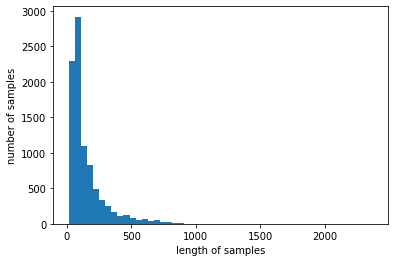

In [37]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

우리가 맞춰야 하는 클래스의 분포를 확인하기
* 모델의 성능에 영향을 줄 수 있는 요소이기 때문에 실제로 모든 클래스가 다 존재는 하는 것인지, 또 어떤 클래스가 유독 많은지와 같은 것들을 사전에 확인해 봐야 함.

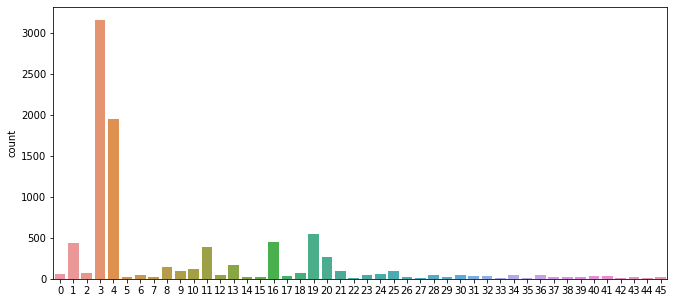

In [38]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

 3번, 4번 클래스가 대부분을 차지하고 있음.
 
 수치적으로 정확히 몇 개인지도 출력

In [39]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


3번, 4번 클래스의 경우에는 각각 3,159개와 1,949개가 존재합니다. 그 뒤로는 549개로 19번 클래스가 세 번째로 많고, 16번 클래스가 444개로 네 번째로 많네요. 이렇게 각 클래스가 몇 개가 존재하는지도 확인해 봤어요.

## 원본 뉴스 데이터로 복원
이 데이터는 이미 어느 정도 전처리가 되어서 각 단어가 정수 시퀀스로 변환된 채 제공되고 있다고 언급했었어요. 하지만 일반적인 상황이라면 텍스트를 숫자로 수치화하는 과정을 처음부터 해야 합니다.

그래서 우리는 여기서 정수 시퀀스로 변환된 데이터를 '굳이' 다시 텍스트로 돌려보겠습니다.

로이터 뉴스 데이터는 '단어'를 key값으로, 고유한 '정수'를 value로 가지는 dictionary를 제공합니다. 이를 word_index로 저장해보겠습니다.

In [40]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
print('=3')

=3


데이터의 단어장(Vocabulary) 입니다. 이제 word_index 안에 단어를 입력하면 이 단어가 어떤 정수와 맵핑이 되는지를 알 수 있습니다. 단어 'the'는 어떤 정수와 맵핑이 될까요?

In [41]:
word_index['the']

1

In [42]:
word_index['it']

13

그런데 지금 우리가 해야 할 일은 현재 갖고 있는 정수 시퀀스로 되어 있는 데이터를 텍스트 형태로 되돌려야 하는 일이므로 사실 word_index보다는 정수로부터 단어를 얻을 수 있는 index_word가 필요합니다.

그런데 이 데이터에는 숨겨진 비밀이 하나 있는데, 뉴스 데이터 안에서 단어 'the'는 사실 1번이 아니라 4번 단어입니다. 그리고 단어 'it'은 사실 13번 단어가 아니라 16번 단어입니다. 왜냐하면 0번, 1번, 2번은 사실 자연어 처리에 쓰이는 특별한 토큰들을 위해 맵핑된 번호이기 때문입니다. (각각 <pad>, <sos>, <unk>라는 토큰을 나타냅니다.)

그렇기 때문에, 다른 단어들도 word_index의 결과로 나오는 숫자에 3을 더해주어야 단어가 실제로 맵핑된 인덱스 값이 나옵니다. 이건 로이터 뉴스 데이터가 정의한 일종의 약속입니다.

In [43]:
index_to_word = { index+3 : word for word, index in word_index.items() }
print('=3')

=3


In [44]:
print(index_to_word[4])
print(index_to_word[16])

the
it


위에서 0번, 1번, 2번 인덱스에는 각각 < pad >, < sos >, < unk >라는 특별한 토큰이 맵핑되어 있다고 했죠? 그래서 만들어진 index_to_word에 이 토큰들도 추가해주어야 진짜 index_to_word가 완성됩니다.

In [45]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token
print('=3')

=3


In [46]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


첫 번째 훈련용 뉴스 기사가 정수 시퀀스에서 텍스트로 복원되었습니다. 이 데이터도 어느 정도 전처리가 된 상태라서, 자연스럽게 읽히지는 않습니다. 하지만 문맥을 가진 텍스트이기 때문에, 이 데이터를 가지고 머신러닝을 시작해도 별 무리는 없어 보입니다.

복원된 첫 번째 훈련용 뉴스 기사에 특별 토큰인 < sos >와 < unk >가 보이는데, < sos >는 텍스트 분류를 위한 토큰이 아니므로 크게 신경을 쓰지 않아도 됩니다. 하지만 < unk >는 자연어 처리 전반에서 쓰이는 특별 토큰이므로 이에 대해서는 이해할 필요가 있습니다.

## OOV 문제와 UNK 토큰
기계가 알고 있는 단어들의 집합을 단어장(Vocabulary)이라고 합니다. 기계가 미처 배우지 못한 모르는 단어를 OOV(Out-Of-Vocabulary) 또는 UNK(Unknown) 이라고 표현합니다. 어떤 단어를 기계가 모르는 단어로 판단하면, 기계는 해당 단어를 전부 <unk>라는 일관된 특별 토큰으로 변환합니다.
    
    num_words=10000는 정수 번호가 10,000이 넘는 단어들을 자동으로 <unk> 토큰으로 처리합니다. 로이터 뉴스 데이터에서 <unk>은 정수 2번을 가지도록 약속돼 있으므로 데이터를 로드하는 과정에서 정수 번호가 10,000이 넘는 단어들은 전부 정수 2로 변환되어서 로드가 되었던 것입니다

In [47]:
target_list =[4, 587, 23, 133, 6, 30, 515]
print(' '.join([index_to_word[index] for index in target_list]))

the transaction is expected to be completed


In [48]:
target_list2 =[4, 12000, 23, 133, 6, 30, 515]    # 12,000은 10,000을 넘는 숫자로 OOV에 해당되므로 <unk>인 2로 변환되어 데이터가 로드 ?
print(' '.join([index_to_word[index] for index in target_list2]))

the staffing is expected to be completed


### 전체 훈련용 뉴스 데이터와 전체 테스트용 뉴스 데이터를 텍스트 데이터로 변환

In [49]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [50]:
#test데이터도 변환해주세요!

test_decoded = []

for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    test_decoded.append(t)

x_test = test_decoded
print(len(x_test))


2246


In [51]:
x_train[:5]

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 '<sos> generale de banque sa lt <unk> br and lt heller overseas corp of chicago have each taken 50 pct stakes in <unk> company sa <unk> factors generale de banque said in a statement it gave no financial details of the transaction sa <unk> <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3',
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for o

In [52]:
x_test[:5]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt <unk> <unk> of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration <unk> chairman <unk> yulo said yulo told reuters a survey during the curren

## 벡터화

이번 실습에서는 딥러닝이 아닌 머신러닝 방법을 사용하여 텍스트 분류를 진행할 예정이기 때문에 벡터화 방법도 인공 신경망이 아닌 방법을 사용하겠습니다. 저희가 사용할 벡터화 방법은 Bag of Words 가설을 기반으로 하는 DTM, TF-IDF 행렬 입니다.

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
print('=3')

=3


Document Term Matrix, DTM은 사이킷런의 CountVectorizer()를 통해서 생성

In [54]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 9670)


TF-IDF Matrix는 사이킷런의 TfidfTransformer()를 통해서 생성 . dtm을 받는다.

In [55]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 9670)


## 나이브 베이즈 분류기

In [56]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

print('=3')

=3


나이브 베이즈 분류기는 사이킷런의 MultinomialNB()를 통해 사용할 수 있다.

*  fit()이라는 함수 
- 훈련 데이터와 해당 훈련 데이터에 대한 레이블을 인자로 사용하면 모델이 이를 학습한다

In [58]:
model = MultinomialNB()
model.fit(tfidfv, y_train)

MultinomialNB()

* 테스트 데이터에 대한 정확도를 측정하기 위해서는 훈련 데이터와 동일한 전처리를 거쳐야 함.
* 테스트 데이터도 TF-IDF 행렬로 변환해 주어야 함.
* 이 후 해당 행렬과 predict() 함수를 통해 예측값을 얻어 정확도를 측정

In [59]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6567230632235085


약 66%의 정확도를 얻었습니다. 사실 그렇게 좋은 성능은 아님.

나이브 베이즈 분류기가 임의의 샘플에 대해서 클래스를 정확히 예측하는지 테스트를 해보겠습니다. 네 번째 샘플(인덱스 상으로는 3)의 원문을 출력하면 다음과 같습니다.

In [60]:
x_test[3]

'<sos> <unk> <unk> oil and gas partnership said it completed the sale of interests in two major oil and gas fields to lt energy assets international corp for 21 mln dlrs the company said it sold about one half of its 50 pct interest in the oak hill and north <unk> fields its two largest producing properties it said it used about 20 mln dlrs of the proceeds to <unk> principal on its senior secured notes semi annual principal payments on the remaining 40 mln dlrs of notes have been satisfied until december 1988 as a result it said the company said the note agreements were amended to reflect an easing of some financial covenants and an increase of interest to 13 5 pct from 13 0 pct until december 1990 it said the <unk> exercise price for 1 125 000 warrants was also reduced to 50 cts from 1 50 dlrs the company said energy assets agreed to share the costs of increasing production at the oak hill field reuter 3'

In [61]:
y_test[3]

4

이 샘플의 레이블은 4네요. 과연 모델은 제대로 예측하고 있는지 그리고 어느 정도의 확신을 가지고 판단하는지 모델이 결정한 확률을 그래프로 시각화해봅시다.

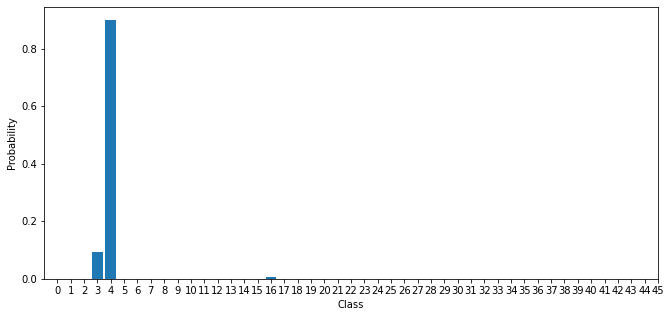

In [62]:
probability_3 = model.predict_proba(tfidfv_test[3])[0]

plt.rcParams["figure.figsize"] = (11,5)
plt.bar(model.classes_, probability_3)
plt.xlim(-1, 21)
plt.xticks(model.classes_)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()

In [63]:
model.predict(tfidfv_test[3])

array([4])

## F1-Score, Confusion Matrix

In [64]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('=3')

=3


### Precision, Recall & F1 Score
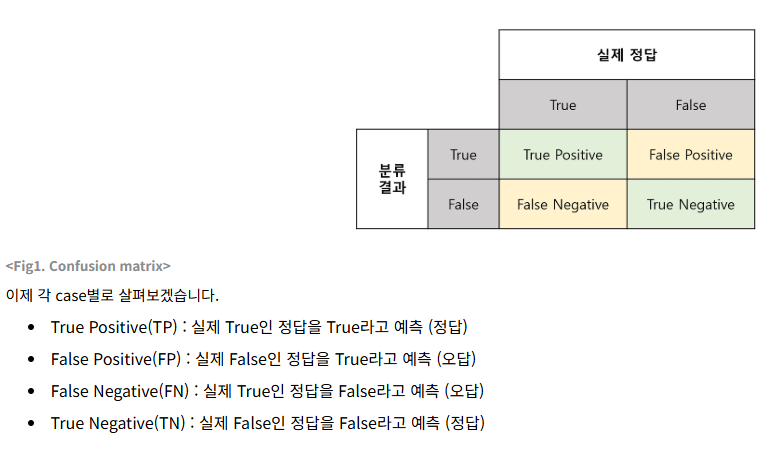

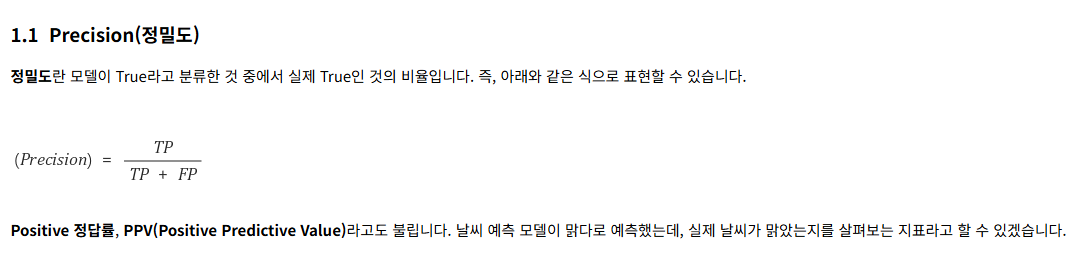

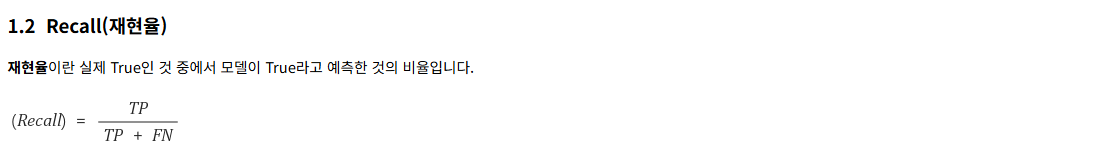

통계학에서는 sensitivity으로, 그리고 다른 분야에서는 hit rate라는 용어로도 사용합니다. 실제 날씨가 맑은 날 중에서 모델이 맑다고 예측한 비율을 나타낸 지표인데, 정밀도(Precision)와 True Positive의 경우를 다르게 바라보는 것입니다. 즉, Precision이나 Recall은 모두 실제 True인 정답을 모델이 True라고 예측한 경우에 관심이 있으나, 바라보고자 하는 관점만 다릅니다. Precision은 모델의 입장에서, 그리고 Recall은 실제 정답(data)의 입장에서 정답을 정답이라고 맞춘 경우를 바라보고 있습니다. 

### 1.3  Precision-Recall Trade-off

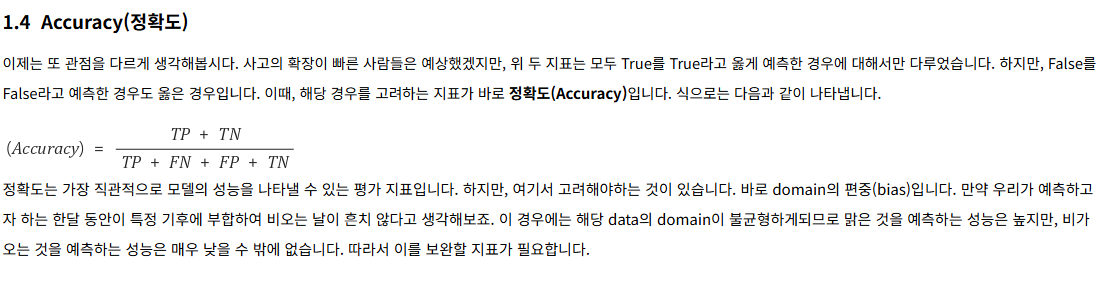

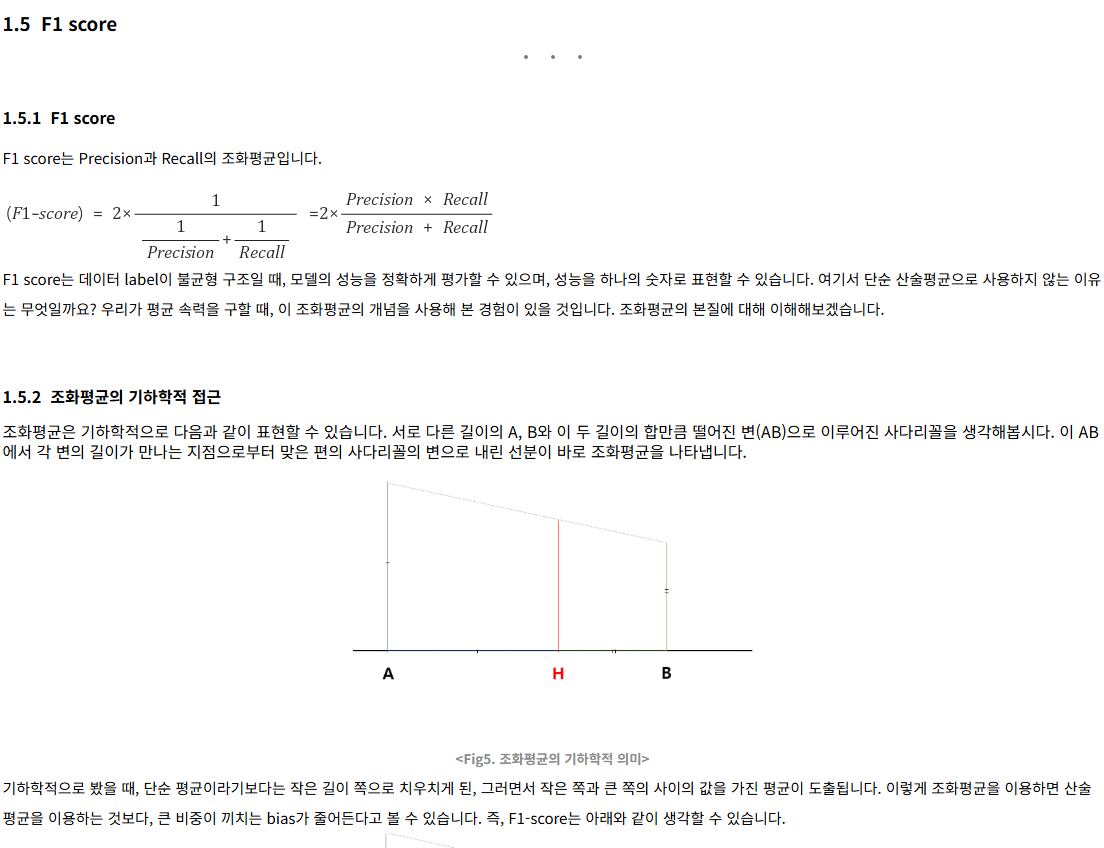

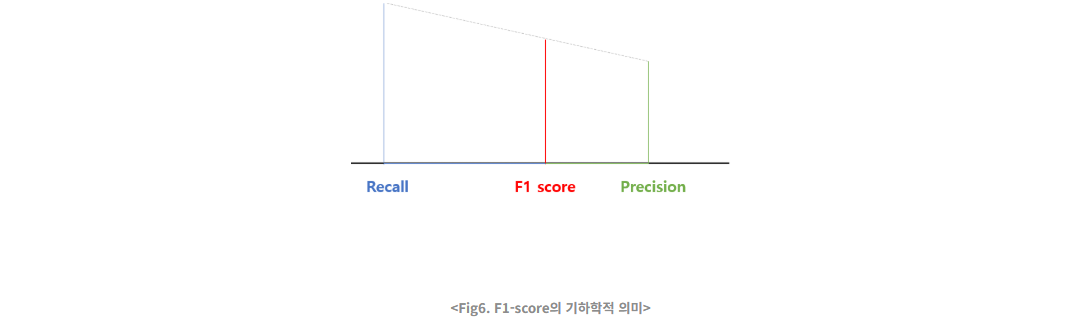

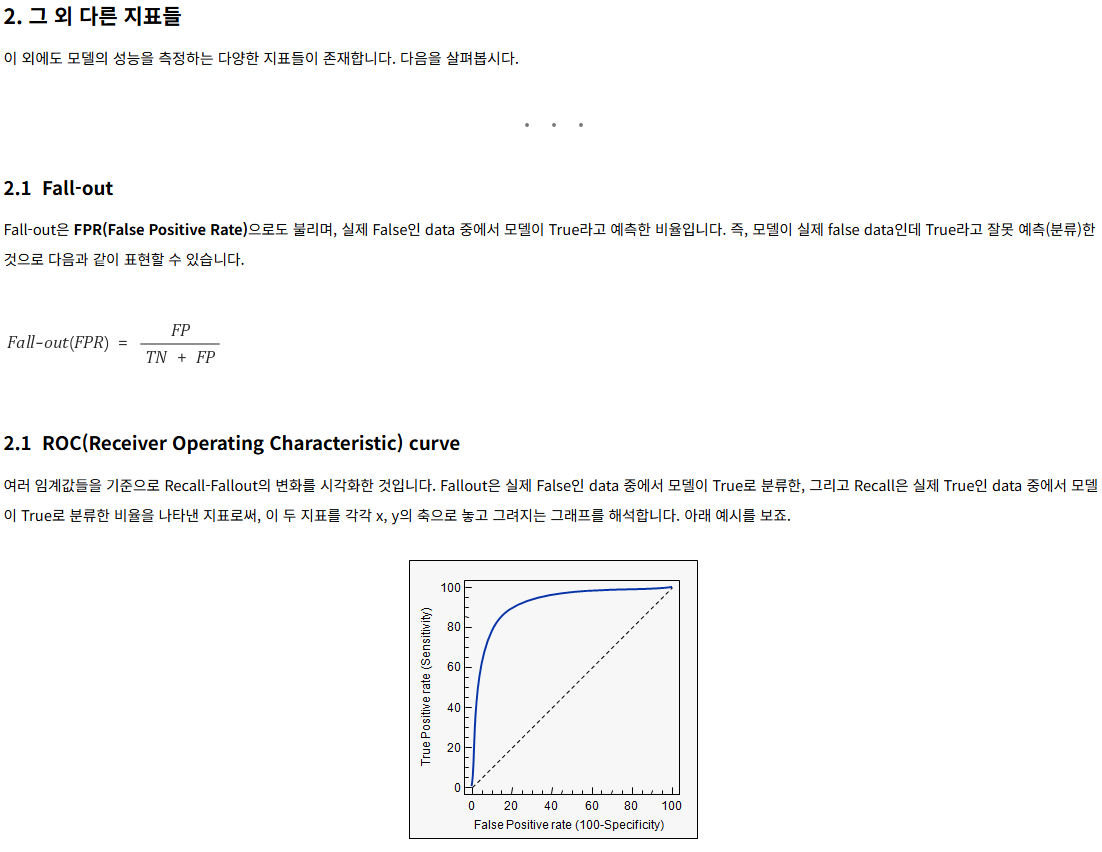

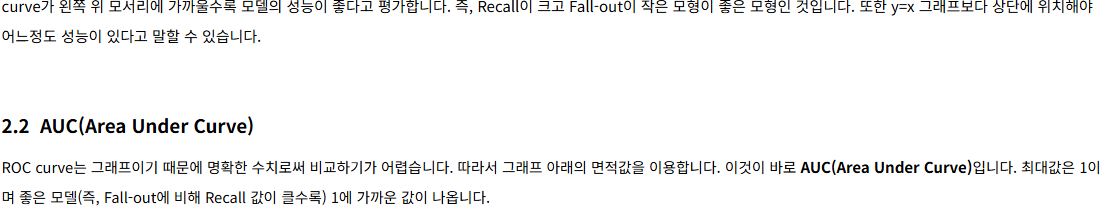

### 사이킷런의 metrics 패키지
* 정밀도, 재현율, F1점수를 구하는 classification_report() 함수를 제공
* 함수는 각각의 클래스를 양성(positive) 클래스로 보았을 때의 정밀도, 재현율, F1점수를 각각 구하고 그 평균값으로 전체 모델의 성능을 평가

In [65]:
print(classification_report(y_test, model.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.62      0.69      0.65       105
           2       0.00      0.00      0.00        20
           3       0.81      0.90      0.85       813
           4       0.51      0.96      0.67       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.08      0.15        25
          10       0.00      0.00      0.00        30
          11       0.66      0.63      0.64        83
          12       0.00      0.00      0.00        13
          13       1.00      0.03      0.05        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.69      0.56      0.61        99
          17       0.00    

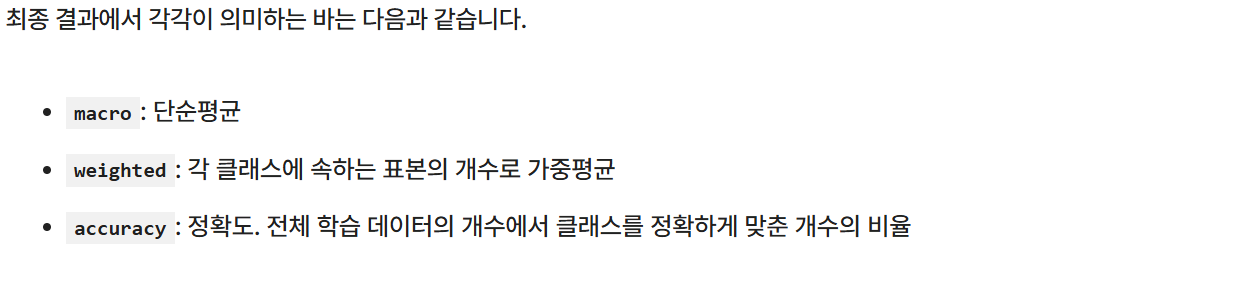

## Confusion Matrix

In [66]:
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
  df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
  fig = plt.figure(figsize=(12,12))
  heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
  plt.ylabel('label')
  plt.xlabel('predicted value')

print('=3')

=3


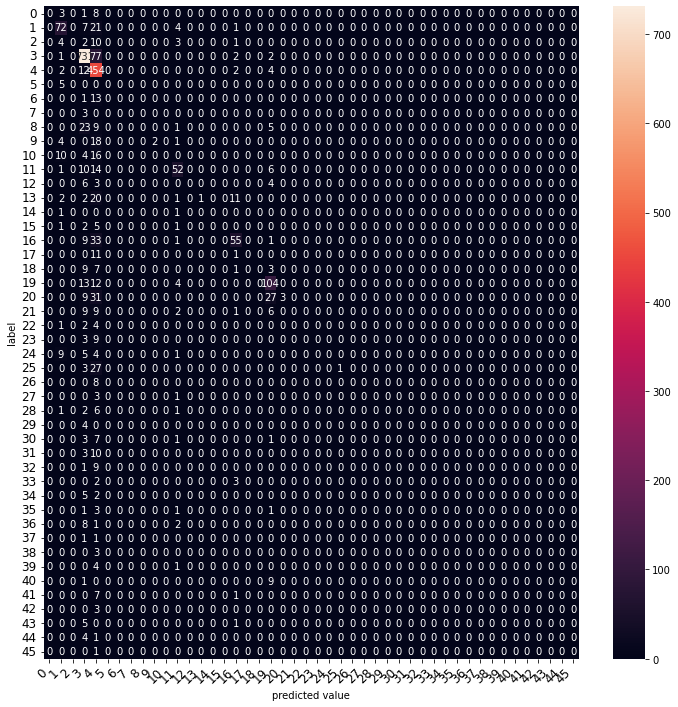

In [67]:
graph_confusion_matrix(model, tfidfv_test, y_test)

# 다양한 머신러닝 모델 사용해보기
## (1) Complement Naive Bayes Classifier(CNB)

나이브 베이지안 분류기는 독립 변수가 '조건부로 독립적'이라는 가정을 하기 때문에, 문서가 특정 분류에 속할 실제 확률을 사용할 때 문제가 발생할 수 있습니다. 예를 들어 많은 샘플(sample)이 특정 클래스에 치우쳐져 있을 경우, 결정 경계의 가중치가 한쪽으로 치우쳐져 모델이 특정 클래스를 선호할 수 있어요. 앞서 로이터 뉴스 데이터에서도 3번, 4번 클래스가 다른 클래스에 비해 상대적으로 많은 클래스를 갖고 있음을 확인했었죠.

데이터가 불균형할 경우를 대비해 나이브 베이즈 분류기를 보완한 것이 컴플리먼트 나이브 베이즈 분류기입니다. 컴플리먼트 나이브 베이즈 분류기는 데이터의 불균형을 고려하여 가중치를 부여하는 특징을 가지고 있습니다. 따라서 컴플리먼트 나이브 베이즈 분류기는 나이브 베이즈 분류기(MultinomialNB)보다 성능이 일반적으로 더 좋습니다.

In [68]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [69]:
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7707034728406055


77%의 정확도를 얻었습니다. 기존 나이브 베이즈 분류기보다 10% 이상 높은 성능입니다.

## (2) 선형분류알고리즘  - 로지스틱 회귀 / 서포트 벡터 머신
### 2.1 로지스틱 회귀(Logistic Regression)
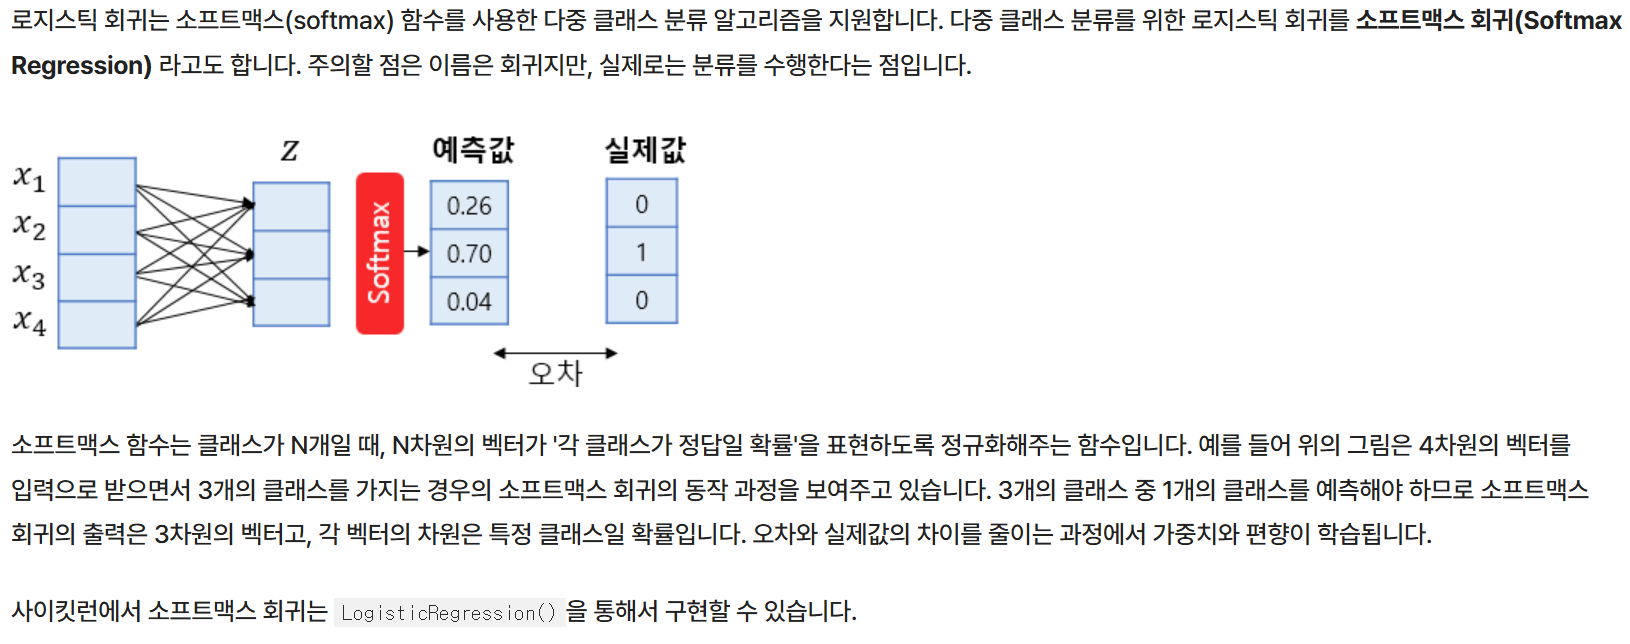

In [70]:
# 10분 정도 소요됩니다.
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(tfidfv, y_train)

LogisticRegression(C=10000, max_iter=3000)

In [71]:
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8107747105966162


80%의 정확도를 얻었습니다. 지금까지의 모델 중 가장 높은 정확도를 얻었습니다.

### 2.2 선형 서포트 벡터 머신(Linear Support Vector Machine) - SVM
* Decision Boundary에 가장 가까이 있는 벡터 - 서포트 벡터.

* 서포트 벡터 머신은 이 벡터만 가지고 연산함.

많은 선형 분류 모델은 태생적으로는 이진 분류만을 지원하는 이진 분류 모델입니다. (위에서 설명한 로지스틱 회귀는 예외입니다.) 서포트 벡터 머신의 구현체인 사이킷런의 LinearSVC 또한 태생적으로는 이진 분류를 위한 모델입니다. 그런데 이진 분류 알고리즘을 다중 클래스 분류 알고리즘으로 사용하는 방법이 있습니다. 바로 일대다(one-vs.-rest 또는 one-vs.-all) 방법입니다. 일대다 방식은 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습시킵니다.

결국 클래스의 수만큼 이진 분류 모델이 만들어집니다. 예측할 때는 만들어진 모든 이진 분류기가 작동하여 가장 높은 점수를 내는 분류기의 클래스를 예측값으로 선택합니다. 서포트 벡터 머신을 사용하여 로이터 뉴스를 분류해 봅시다.

In [72]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc.fit(tfidfv, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1000, dual=False, max_iter=3000, penalty='l1')

In [73]:
predicted_svc = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted_svc)) #예측값과 실제값 비교

정확도: 0.782279608192342


78%의 정확도 얻음

## (3) 결정 트리(Decision Tree)
DecisionTreeClassifier()를 사용해서 결정 트리를 구현할 수 있습니다. 결정 트리의 깊이는 max_depth라는 인자를 통해서 정해줄 수 있음.

In [74]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [75]:
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6202137132680321


지금까지의 모델 중 가장 낮은 정확도인 62%를 얻습니다. 사실 트리 계열의 모델들은 고차원이고 희소한 데이터에 대해서는 성능이 나오지 않는다는 특징이 있습니다. DTM이나 TF-IDF 행렬의 경우 고차원이면서 대부분의 값이 0인 희소한 데이터이므로 트리 계열의 모델보다는 선형 분류 모델을 통해 접근하는 것이 더 나은 접근일 수 있습니다.

## (4) 랜덤 포레스트(Random Forest)
앙상블(Ensemble) 이란 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법입니다. 뒤에서 보팅(Voting)이라는 앙상블 기법을 알아볼 텐데, 모델 자체가 앙상블을 사용하는 앙상블 모델들도 존재합니다. 랜덤 포레스트와 그래디언트 부스팅 트리는 결정 트리를 사용하는 앙상블 모델입니다.

In [77]:
#estimator를 5로 설정하고 random_state를 0으로 설정한 RandomForestClassifier를 선언해주세요.
#참고자료 : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
forest = RandomForestClassifier(random_state=0 , n_estimators = 5)
forest.fit(tfidfv, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [78]:
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.674087266251113


## (5) 그래디언트 부스팅 트리(GradientBoostingClassifier)
그래디언트 부스팅 트리는 여러 개의 결정 트리를 묶어 만드는 앙상블 모델입니다. 그레디언트 부스팅은 랜덤 포레스트와 다르게 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만듭니다.

그래디언트 부스팅 트리는 일부 특성을 무시한다는 특징을 가지고 있습니다. 그래서 보통 랜덤 포레스트를 먼저 사용해보고, 성능이나 예측 시간 면에서 만족스럽지 않은 경우에 그래디언트 부스팅 트리를 시도해보는 것이 좋습니다.

일반적으로 1 ~ 5 정도의 깊지 않은 트리를 사용하므로 메모리도 적게 사용하고 예측도 빠릅니다.

정확도도 준수하고, 특히 예측 속도가 빠르다는 점에서 데이터 경진 대회에서 많은 우승을 했던 모델입니다. 다만, 훈련 시간의 속도가 좀 오래 걸리고, 트리 기반 모델의 특성으로 인해서 희소한 고차원 데이터에 대해서는 잘 동작하지 않는다는 단점이 있습니다.

현재 우리가 사용하는 TF-IDF 행렬은 희소하고 고차원 데이터지만, 결정 트리나 랜덤 포레스트보다 더 높은 성능을 얻을 수 있을지 한번 테스트해 볼까요?

저는 아래 코드 실행에 약 12분 정도 소요되었습니다. verbose=3을 GradientBoostingClassifier안에 인자로 넣어 진행 상황을 확인할 수 있으니 참고해 주세요!

In [79]:
# 15분 정도 소요될 수 있습니다.
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

GradientBoostingClassifier(random_state=0)

In [80]:
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7662511130899377


## (6) 보팅(Voting)
이전에 사용했던 세 가지 모델인 로지스틱 회귀, CNB, 그래디언트 부스팅 트리를 사용하여 소프트 보팅을 하였을 때의 성능을 비교해 봅시다.

In [81]:
# 20분 이상 소요될 수 있습니다.
# Voting을 구현해보세요. (Voing은 'soft'로 설정)
# 조건1 : 로지스틱회귀를 사용해주세요(패널티는 'L2'로 설정)
#조건 2: Complement Naive Bayes Classifier를 사용해주세요
#조건 3: GradientBoosting Classifier를 사용해주세요
# 참고자료 : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(random_state=0, penalty='l2')
clf2 = ComplementNB()
clf3 = GradientBoostingClassifier(random_state=0, verbose=3)


voting_classifier =  VotingClassifier(estimators=[
        ('lr', clf1), ('nb', clf2), ('gb', clf3)], voting='soft')
voting_classifier.fit(tfidfv, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


      Iter       Train Loss   Remaining Time 
         1           1.4608           15.41m
         2       95544.1548           15.48m
         3      105411.1055           15.37m
         4 26490374809120059619893320924222374741943986946048.0000           15.26m
         5 3332464259228453694671945105465820387521328203545526380221295913764842145866429631276902168311601749602693928777633481065758720.0000           15.12m
         6 3332464259228453694671945105465820387521328203545526380221295913764842145866429631276902168311601749602693928777633481065758720.0000           14.97m
         7 3332464259228453694671945105465820387521328203545526380221295913764842145866429631276902168311601749602693928777633481065758720.0000           14.81m
         8 3332464259228453694671945105465820387521328203545526380221295913764842145866429631276902168311601749602693928777633481065758720.0000           14.66m
         9 33324642592284536946719451054658203875213282035455263802212959137648421458664296

        54 14834291270935598097793813192422686817633454293445808551806972586635235618984506254543094943361504759490214512223227966451089408.0000            7.34m
        55 14834291270935598097793813192422686817633454293445808551806972586635235618984506254543094943361504759490214512223227966451089408.0000            7.18m
        56 14834291270935598097793813192422686817633454293445808551806972586635235618984506254543094943361504759490214512223227966451089408.0000            7.02m
        57 14834291270935598097793813192422686817633454293445808551806972586635235618984506254543094943361504759490214512223227966451089408.0000            6.86m
        58 14834291270935598097793813192422686817633454293445808551806972586635235618984506254543094943361504759490214512223227966451089408.0000            6.70m
        59 14834291270935598097793813192422686817633454293445808551806972586635235618984506254543094943361504759490214512223227966451089408.0000            6.54m
        60 14834291270935598

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=0)),
                             ('nb', ComplementNB()),
                             ('gb',
                              GradientBoostingClassifier(random_state=0,
                                                         verbose=3))],
                 voting='soft')

In [82]:
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7969723953695459
